# Tertiaire

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# load the data
df = pd.read_csv('notebooks/rapprochements/DPE/dpe-v2-tertiaire-2.csv', sep=',')

In [3]:
df.shape

(289405, 63)

In [4]:
df.head()

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Méthode_du_DPE,N°_immatriculation_copropriété,Invariant_fiscal_logement,Etiquette_DPE,Etiquette_GES,Conso_kWhep/m²/an,Emission_GES_kgCO2/m²/an,Année_construction,Catégorie_ERP,Période_construction,Secteur_activité,Nombre_occupant,Surface_(SHON),Surface_utile,Type_énergie_principale_chauffage,Adresse_brute,Nom__commune_(BAN),Code_INSEE_(BAN),N°_voie_(BAN),Identifiant__BAN,Adresse_(BAN),Code_postal_(BAN),Score_BAN,Nom__rue_(BAN),Coordonnée_cartographique_X_(BAN),Coordonnée_cartographique_Y_(BAN),Code_postal_(brut),N°_étage_appartement,Nom_résidence,Complément_d'adresse_bâtiment,Cage_d'escalier,Complément_d'adresse_logement,Statut_géocodage,Nom__commune_(Brut),N°_département_(BAN),N°_région_(BAN),Conso_é_finale_énergie_n°1,Conso_é_primaire_énergie_n°1,Type_énergie_n°1,Type_usage_énergie_n°1,Frais_annuel_énergie_n°1,Année_relève_conso_énergie_n°1,Conso_é_finale_énergie_n°2,Conso_é_primaire_énergie_n°2,Type_énergie_n°2,Type_usage_énergie_n°2,Frais_annuel_énergie_n°2,Année_relève_conso_énergie_n°2,Conso_é_finale_énergie_n°3,Conso_é_primaire_énergie_n°3,Type_énergie_n°3,Type_usage_énergie_n°3,Frais_annuel_énergie_n°3,Année_relève_conso_énergie_n°3
0,2363T1680837R,2023-05-23,2023-05-22,2023-05-11,DPE 2006 tertiaire et ERP,NaN,2033-05-21,2.2,NaN,dpe tertiaire vierge,NaN,NaN,NaN,NaN,NaN,NaN,1988.0,5ème Catégorie,1983-1988,"W : Administrations, banques, bureaux",0.0,91.6,100.0,NaN,24 TER AVENUE D'AUBIÈRE,Cournon-d'Auvergne,63124,24ter,63124_0035_00024_ter,24ter avenue d'Aubière 63800 Cournon-d'Auvergne,63800.0,0.83,avenue d'Aubière,712942.36,6516058.35,63800,0.0,NaN,002ER459997,NaN,NaN,adresse non géocodée ban car aucune correspond...,COURNON-D'AUVERGNE,63,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2269T2615953W,2022-11-05,2022-11-04,2022-10-19,DPE 2006 tertiaire et ERP,NaN,2032-11-03,2.2,NaN,dpe tertiaire facture,NaN,NaN,C,C,159.3,23.8,1979.0,5ème Catégorie,1978-1982,U : Établissements de soins,0.0,135.9,100.0,NaN,707 route de la Condamine\nCENTRE MEDICAL GERM...,Chabanière,69228,707,69228_0086_00707,707 Route de la Condamine 69440 Chabanière,69440.0,0.51,Route de la Condamine,828010.81,6499110.54,69440,0.0,NaN,041122/56101,NaN,NaN,adresse géocodée ban à l'adresse,CHABANIERE,69,84.0,14565.8,14565.8,Gaz naturel,périmètre de l'usage inconnu,1620.0,2021.0,4024.0,9255.2,Électricité,périmètre de l'usage inconnu,1167.0,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2357T4209637Z,2023-12-07,2023-12-06,2023-12-06,DPE 2006 tertiaire et ERP,NaN,2033-12-05,2.3,NaN,dpe tertiaire vierge dans un bâtiment de logement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ème Catégorie,1948-1974,"M : Magasins de vente, centres commerciaux",0.0,74.6,100.0,NaN,4 rue de France,Phalsbourg,57540,4,57540_0300_00004,4 Rue de France 57370 Phalsbourg,57370.0,0.52,Rue de France,1012776.32,6860453.93,57370,0.0,NaN,2023-RW-209-SCI MAVI,NaN,RDC,adresse géocodée ban à l'adresse,PHALSBOURG,57,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2360T0127880L,2023-01-16,2023-01-15,2023-01-05,DPE 2006 tertiaire et ERP,NaN,2033-01-14,2.2,NaN,dpe tertiaire vierge,NaN,NaN,NaN,NaN,NaN,NaN,1900.0,5ème Catégorie,avant 1948,"M : Magasins de vente, centres commerciaux",500.0,NaN,123.0,NaN,Yvonne Genty,Blacourt,60073,7,60073_0075_00007,7 Place Yvonne Genty 60650 Blacourt,60650.0,0.94,Place Yvonne Genty,617387.30,6930052.21,60650,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,BLACOURT,60,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2271T0492563C,2022-03-11,2022-03-10,2022-03-10,DPE 2006 tertiaire et ERP,NaN,2032-03-09,2.0,NaN,dpe tertiaire vierge,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,NaN,avant 1948,"M : Magasins de vente, centres commerciaux",1.0,140.0,140.0,NaN,14 RUE DES HALLES / 9 RUE BASSE,Montcenis,71309,14,71309_0070_00014,14 Rue Basse 71710 Mo

In [5]:
df_select = df[['N°DPE', 'Date_réception_DPE', 'Identifiant__BAN', 'Score_BAN', 'Statut_géocodage']]
df_select.head()

,N°DPE,Date_réception_DPE,Identifiant__BAN,Score_BAN,Statut_géocodage
0,2363T1680837R,2023-05-23,63124_0035_00024_ter,0.83,adresse non géocodée ban car aucune correspond...
1,2269T2615953W,2022-11-05,69228_0086_00707,0.51,adresse géocodée ban à l'adresse
2,2357T4209637Z,2023-12-07,57540_0300_00004,0.52,adresse géocodée ban à l'adresse
3,2360T0127880L,2023-01-16,60073_0075_00007,0.94,adresse non géocodée ban car aucune correspond...
4,2271T0492563C,2022-03-11,71309_0070_00014,0.55,adresse non géocodée ban car aucune correspond...


<Axes: >

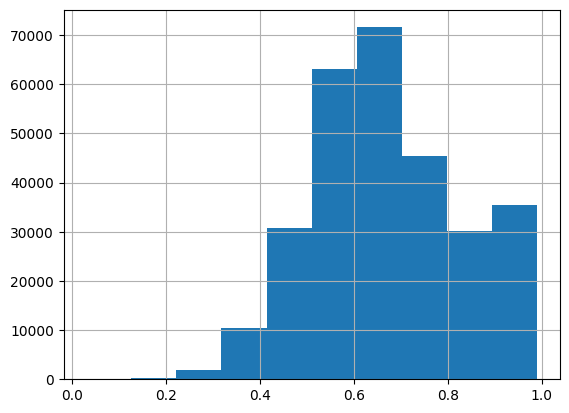

In [6]:
df_select['Score_BAN'].hist()

# Le score BAN n'est en fait pas le score renvoyé par l'API mais semble correspondre au champ "importance" de l'API
# d'apres la doc, c'est un champ technique.
# ils se sont probablemlent trompé de champ.

In [7]:
# nombres de lignes qui n'ont pas d'identifiant BAN
df_select['Identifiant__BAN'].isnull().sum()

735

In [8]:
from batid.models import Building
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

def get_buildings_from_ban_id(ban_id):
    buildings = Building.objects.filter(addresses_read_only__id=ban_id).values('rnb_id')
    return [b['rnb_id'] for b in buildings]

In [9]:
# df_sample = df_select.sample(10)

df_rapprochement = df_select.copy()
df_rapprochement['rnb_id_from_ban_id'] = df_rapprochement['Identifiant__BAN'].apply(get_buildings_from_ban_id)

In [10]:
df_rapprochement.to_csv('notebooks/rapprochements/DPE/dpe-v2-tertiaire-2-rapprochement.csv', index=False)

In [4]:
df_results = pd.read_csv('notebooks/rapprochements/DPE/dpe-v2-tertiaire-2-rapprochement.csv', sep=',')

In [5]:
# split the df dataframe into 100 sub data frames
from concurrent.futures import ThreadPoolExecutor

dfs = [df_results.iloc[i*df_results.shape[0]//100:(i+1) * df_results.shape[0]//100] for i in range(100)]

# create a function to remove small surfaces
def remove_small_surfaces(rnb_ids):
    results = []
    for rnb_id in rnb_ids:
        raw_sql = f"SELECT id, ST_AREA(shape::geography) FROM batid_building WHERE rnb_id = '{rnb_id}'"
        total_surface = Building.objects.raw(raw_sql)[0].st_area
        if total_surface > 25:
            results.append(rnb_id)
    return results

# multi thread apply the function to the dataframes and concatenate the results
def rnb_id_filtered(df):
    df_copy = df.copy()
    df_copy['rnb_id_filtered'] = df['rnb_id_from_ban_id'].apply(eval).apply(remove_small_surfaces)
    return df_copy

with ThreadPoolExecutor(max_workers=10) as executor:
    results = executor.map(rnb_id_filtered, dfs)
    df_filtered = pd.concat(results)
    df_filtered.to_csv('notebooks/rapprochements/DPE/dpe-v2-tertiaire-2-rapprochement-filtered.csv', index=False)

In [9]:
df_results_filtered = pd.read_csv('notebooks/rapprochements/DPE/dpe-v2-tertiaire-2-rapprochement-filtered.csv', sep=',')

Pourcentage de match 1-1 avant filtre des petites surfaces

In [16]:
df_results_filtered['rnb_id_from_ban_id'].apply(eval).apply(len).value_counts()[1] / df_results.shape[0] * 100

49.346417650006046

Pourcentage de match 1-1 APRES filtre des petites surfaces

In [18]:
df_results_filtered['rnb_id_filtered'].apply(eval).apply(len).value_counts()[1] / df_results.shape[0] * 100

50.12525699279556

Ecriture de rapprochement fichier final pour envoi 

In [25]:
df_results_filtered[['N°DPE', 'Date_réception_DPE', 'rnb_id_filtered']].to_csv('notebooks/rapprochements/DPE/dpe-v2-tertiaire-2-rapprochement-final-results.csv', index=False, sep=',')